Mounted at /content/drive


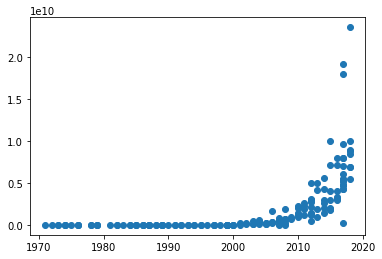

In [ ]:
# Importar módulos

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Leer los datos en famas de datos
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/tensorflow/sample_file.csv', header=None)
# Make X a 2-D array of size N x D where D = 1 / .values converts series to numpy arrray
X = df.values[:,0] #.reshape(-1, 1)
Y = df.values[:,1]

# Graficar los datos: es exponencial

plt.scatter(X, Y)

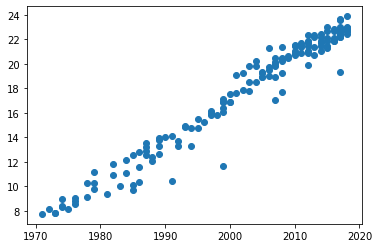

In [ ]:
# Como queremos un modelo lineal, tomamos el registro
Y = np.log(Y)
plt.scatter(X, Y)

In [ ]:
# Recuerde escalar los datos

X = X - X.mean()


# Creemos una estructura de modelo TensorFlow aquí

model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(1,)),
tf.keras.layers.Dense(1)
])

# Compila el modelo

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mean_squared_error')

# Establecer tasa de aprendizaje

def lean_rate(epoch, lr):
  if epoch >= 50:
    return 0.0001
  else :
    return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(lean_rate)


# entrenar al modelo

fit = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 361.4661 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 328.4521 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 267.8880 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 252.5992 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 207.1656 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 193.3394 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 177.9047 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 132.0153 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 106.8470 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 69.2797 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss

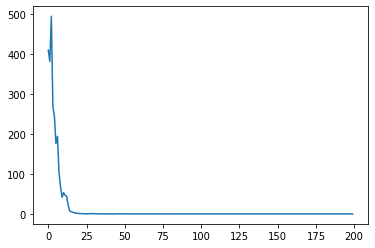

In [ ]:
#Tracemos los resultados

# Plot the loss
plt.plot(fit.history['loss'], label='loss')

In [ ]:

# Nuestra red tiene una sola capa.
# Permite mostrar el valor de m & b en la ecuación lineal y = mx + b

print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34566164]], dtype=float32), array([17.764088], dtype=float32)]


6/6 [==============================] - 0s 2ms/step


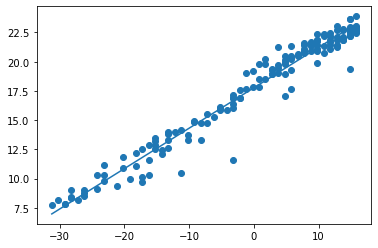

In [ ]:
# Usamos la misma X para predecir

pred = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, pred)

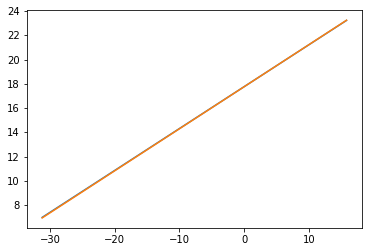

In [ ]:
# Verifiquemos si nuestro modelo es exacto

#Obtenemos el peso (w) y el sesgo (b)

w, b = model.layers[0].get_weights()

#Nosotras aplicamos y = mx + b

pred2 = ((X * w) + b).flatten()

# Graficar la prediccion con formula
plt.plot(X, pred)

# Graficar la prediccion con el modelo
plt.plot(X, pred2)